Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.
На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

from tensorflow.keras.utils import to_categorical


In [62]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



x_train = x_train.reshape(60000,28,28,1).astype('float32') / 255.

x_test = x_test.reshape(10000,28,28,1).astype('float32') / 255.


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [63]:
#train_images_path = "/kaggle/input/mnist-dataset/train-images-idx3-ubyte"
#train_labels_path = "/kaggle/input/mnist-dataset/train-labels-idx1-ubyte"
#test_images_path = "/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte"
#test_labels_path = "/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte"

In [64]:
#with open(train_images_path, "rb") as f:
#    x_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(60000, 28,28,1)
#with open(train_labels_path, "rb") as f:
#    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
#with open (test_images_path, "rb") as f:
#    x_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(10000,28,28,1)
#with open(test_labels_path, "rb") as f:
#    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32")  / 255

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

#x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [65]:
from keras import layers
from keras import models

Best parameters from previous Home task 12:

Number of layers: 5

Number of neurons in the layer 1: 512

Number of neurons in the layer 2: 480

Number of neurons in the layer 3: 48

Number of neurons in the layer 4: 496

Number of neurons in the layer 5: 96

Activation function:softplus

Optimizer: adam

Dropout rate was not selected.

In [66]:
number_of_neurons = [512, 480, 48, 496, 96]
num_of_layers = 5

In [67]:
#creating a convolutional network and adding the Dense layers with best parameters I got solving previous Home_task_12 
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
                                             
])

for neurons in number_of_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation = "softplus"))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

#model.compile(
#    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
#    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
#    metrics = [tf.keras.metrics.SparseCategoricalAccuracy(), "accuracy"]
#)

model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 256)       147712    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 128)         295040    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 128)       

In [68]:
model.fit(x_train, y_train, epochs=50, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/50


2024-11-10 08:25:25.303908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.8956 - accuracy: 0.6554

2024-11-10 08:25:45.130725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 22s 23ms/step - loss: 0.8956 - accuracy: 0.6554 - val_loss: 0.5856 - val_accuracy: 0.7765
Epoch 2/50
938/938 [==============================] - 21s 23ms/step - loss: 0.5310 - accuracy: 0.7951 - val_loss: 0.4988 - val_accuracy: 0.8121
Epoch 3/50
938/938 [==============================] - 21s 22ms/step - loss: 0.4552 - accuracy: 0.8281 - val_loss: 0.4614 - val_accuracy: 0.8259
Epoch 4/50
938/938 [==============================] - 21s 22ms/step - loss: 0.3989 - accuracy: 0.8528 - val_loss: 0.4134 - val_accuracy: 0.8510
Epoch 5/50
938/938 [==============================] - 21s 22ms/step - loss: 0.3557 - accuracy: 0.8694 - val_loss: 0.3541 - val_accuracy: 0.8711
Epoch 6/50
938/938 [==============================] - 21s 22ms/step - loss: 0.3276 - accuracy: 0.8790 - val_loss: 0.3325 - val_accuracy: 0.8789
Epoch 7/50
938/938 [==============================] - 21s 22ms/step - loss: 0.3072 - accuracy: 0.8873 - val_loss: 0.3425 - val_accuracy: 0.8733
Epo

In [83]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Model test accuracy: {test_accuracy}")

313/313 [==============================] - 4s 11ms/step - loss: 0.3789 - accuracy: 0.9223
Model test accuracy: 0.9222999811172485


313/313 [==============================] - 2s 6ms/step


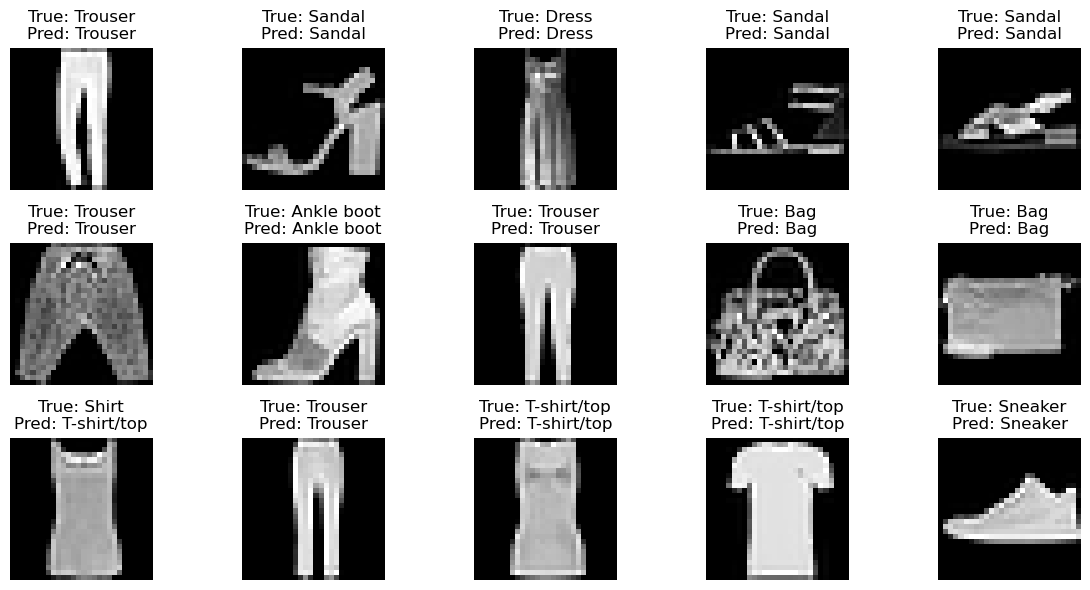

In [96]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

random_indices = np.random.choice(len(x_test), size=15, replace=False)

plt.figure(figsize=(12,6))
for i, idx in enumerate(random_indices):
    true_lable = np.argmax(y_test[idx])
    predicted_label = predicted_labels[idx]

    plt.subplot(3,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
    plt.axis("off")

    plt.title(f"True: {class_names[true_lable]}\nPred: {class_names[predicted_label]}")

plt.tight_layout()
plt.show()






Точность модели согласнo Home Task 12(без использования convoluted layers): Final validation accuracy: 0.8938999772071838

Точность текущей модели с использованием convoluted layers составляет: 0.9222, что на 3% выше чем точность модели без этих слоев.

Данную точность практически невозможно достичь без convoluted layers.

In [70]:
model.save("Model_from Task_13_part_01.h5")

Частина 2

​В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [71]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#weights_path = "/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
conv_base.trainable = False

model_freeze = models.Sequential([
    layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)),
    layers.Resizing(32,32),
    conv_base,
    layers.Flatten(),
    
])

for neurons in number_of_neurons:
    dense_layer = layers.Dense(neurons, activation = "softplus")
    dense_layer.trainable = True
    model_freeze.add(dense_layer)
    model_freeze.add(layers.BatchNormalization())
    model_freeze.add(layers.Dropout(0.1))
    
output_layer = layers.Dense(10, activation='softmax')
output_layer.trainable = True
model_freeze.add(output_layer)

model_freeze.compile(
    optimizer= tf.keras.optimizers.legacy.Adam(learning_rate = 1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [73]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)


In [74]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience=15,
    restore_best_weights=True
)

history_freeze = model_freeze.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=150,
    validation_data=test_generator,
    validation_steps=50,
    callbacks = [early_stopping]
)

Epoch 1/150


2024-11-10 12:17:46.559064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-10 12:17:47.080136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.2765 - accuracy: 0.5628

2024-11-10 12:17:50.801607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-10 12:17:50.881761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 6s 43ms/step - loss: 1.2765 - accuracy: 0.5628 - val_loss: 2.0425 - val_accuracy: 0.1025
Epoch 2/150
100/100 [==============================] - 4s 40ms/step - loss: 0.9801 - accuracy: 0.6453 - val_loss: 1.5805 - val_accuracy: 0.4675
Epoch 3/150
100/100 [==============================] - 4s 40ms/step - loss: 0.9143 - accuracy: 0.6722 - val_loss: 1.0785 - val_accuracy: 0.6581
Epoch 4/150
100/100 [==============================] - 4s 39ms/step - loss: 0.8833 - accuracy: 0.6816 - val_loss: 0.8790 - val_accuracy: 0.6869
Epoch 5/150
100/100 [==============================] - 4s 40ms/step - loss: 0.8737 - accuracy: 0.6884 - val_loss: 0.7652 - val_accuracy: 0.7169
Epoch 6/150
100/100 [==============================] - 4s 39ms/step - loss: 0.8527 - accuracy: 0.6809 - val_loss: 0.8277 - val_accuracy: 0.6975
Epoch 7/150
100/100 [==============================] - 4s 39ms/step - loss: 0.8255 - accuracy: 0.7078 - val_loss: 0.7768 - val_accuracy: 0.7125
Epoc

In [98]:
test_loss, test_accuracy= model_freeze.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

  7/313 [..............................] - ETA: 5s - loss: 0.5442 - accuracy: 0.8036

2024-11-10 14:06:23.801065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 7s 21ms/step - loss: 0.5865 - accuracy: 0.7843
Test accuracy: 0.7843000292778015


In [76]:
model_freeze.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, None, None, 3)     0         
                                                                 
 resizing_6 (Resizing)       (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_25 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                     

1/1 [==============================] - 0s 43ms/step


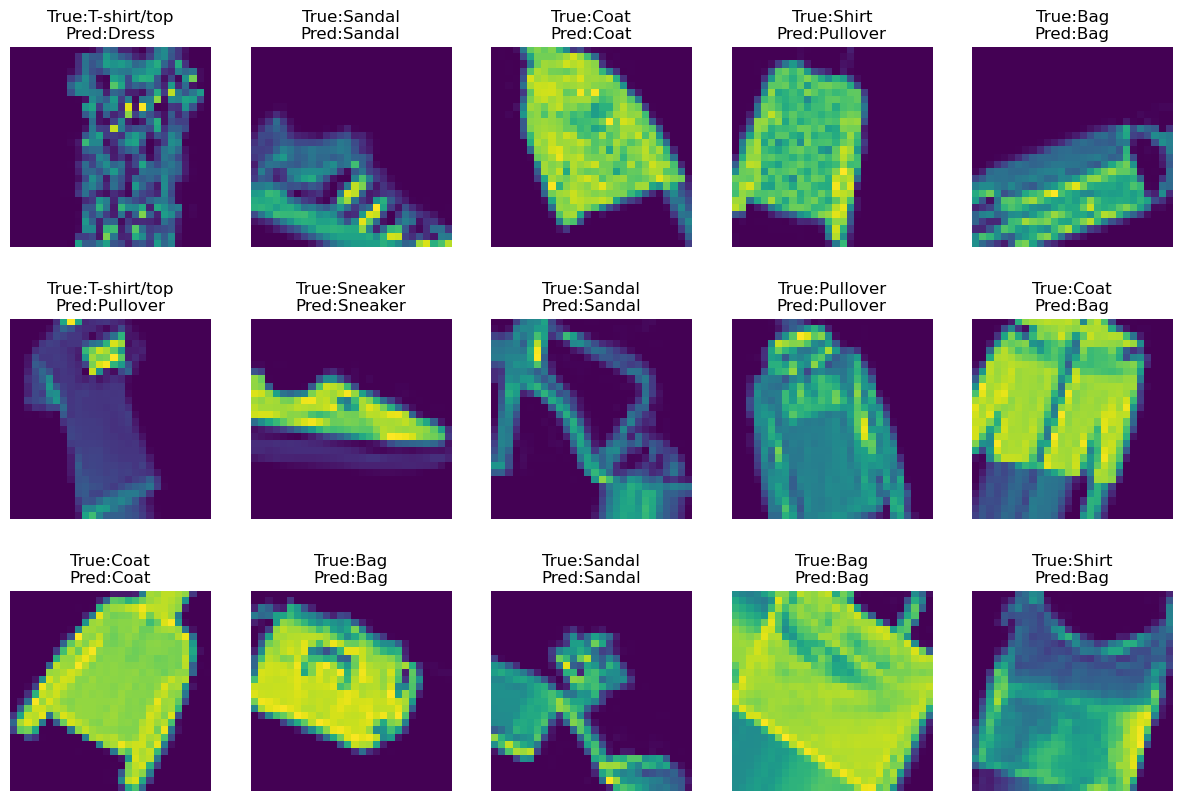

In [99]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# getting predictions using augmented images to see how good model differentiates augmented images 
augmented_images, augmented_labels = next(train_generator)
predictions_with_freeze_vgg16 = model_freeze.predict(augmented_images)
predicted_labels = np.argmax(predictions_with_freeze_vgg16, axis=1)

num_images=15
plt.figure(figsize=(15,10))

for i in range(num_images):
    true_label = np.argmax(augmented_labels[i])
    predicted_label = predicted_labels[i]
    plt.subplot(3,5,i+1)
    plt.imshow((augmented_images[i]*255).astype("uint8"))
    plt.axis("off")
    plt.title(f"True:{class_names[true_label]}\nPred:{class_names[predicted_label]}")
plt.tight_layout
plt.show()


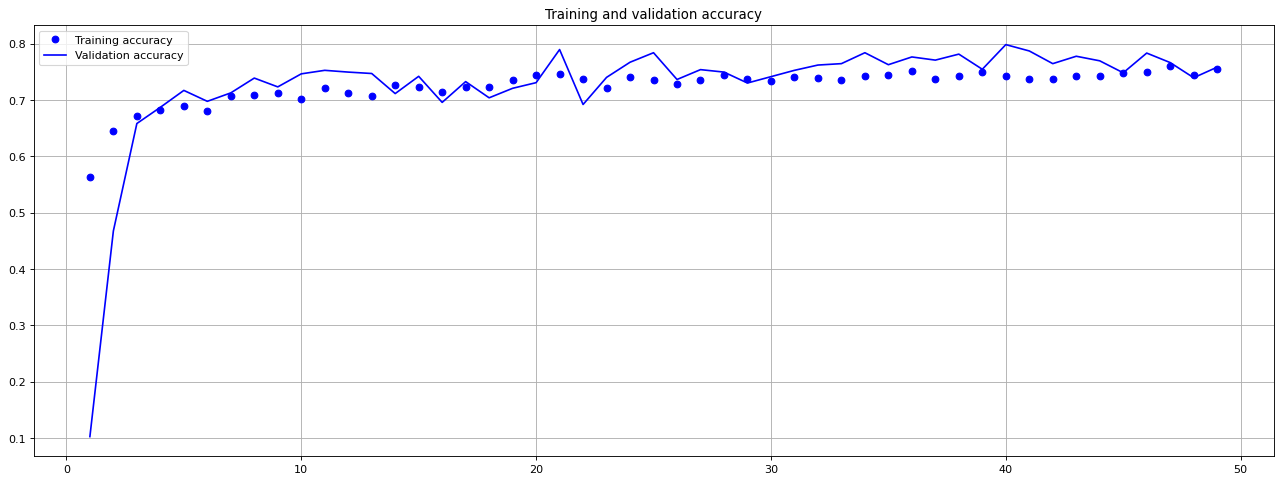

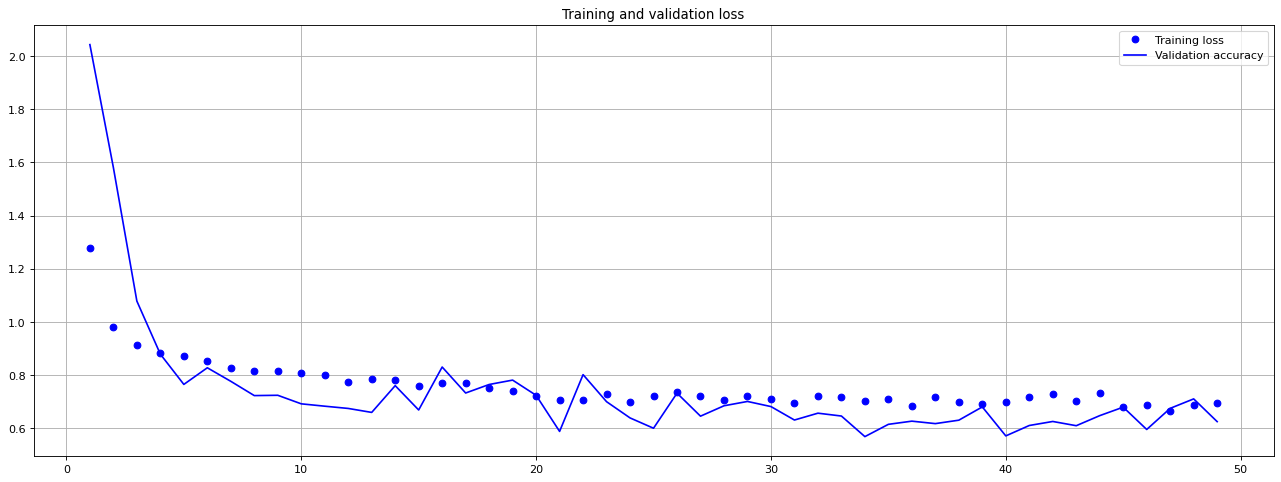

In [77]:
#графіки зміни точності та втрат на тестових та валідаційних даних:
accuracy = history_freeze.history["accuracy"]
val_accuracy = history_freeze.history["val_accuracy"]

loss = history_freeze.history["loss"]
val_loss = history_freeze.history["val_loss"]

epochs = range(1, len(accuracy)+1)

plt.figure(figsize = (20,7), dpi=80)
plt.grid(True)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize = (20,7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation accuracy")
plt.title("Training and validation loss")
plt.legend()


In [78]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [79]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

weights_path = "/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
conv_base = VGG16(weights = "imagenet", include_top=False, input_shape=(32,32,3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model_unfreeze = models.Sequential([
    layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)),
    layers.Resizing(32,32),
    conv_base,
    layers.Flatten(),
    
])

for neurons in number_of_neurons:
    dense_layer = layers.Dense(neurons, activation = "softplus")
    dense_layer.trainable = True
    model_unfreeze.add(dense_layer)
    model_unfreeze.add(layers.BatchNormalization())
    model_unfreeze.add(layers.Dropout(0.1))
    
output_layer = layers.Dense(10, activation='softmax')
output_layer.trainable = True
model_unfreeze.add(output_layer)


#model_unfreeze.summary()

In [80]:
model_unfreeze.compile(
    optimizer= tf.keras.optimizers.legacy.Adam(learning_rate = 1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_unfreeze = model_unfreeze.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 150,
    validation_data = test_generator,
    validation_steps = 50,
    callbacks = [early_stopping, lr_scheduler]
)

Epoch 1/150


2024-11-10 12:21:10.122657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-10 12:21:10.699989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.2091 - accuracy: 0.5719

2024-11-10 12:21:15.254684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-11-10 12:21:15.335313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 7s 49ms/step - loss: 1.2091 - accuracy: 0.5719 - val_loss: 5.4253 - val_accuracy: 0.1394 - lr: 0.0010
Epoch 2/150
100/100 [==============================] - 4s 43ms/step - loss: 0.9105 - accuracy: 0.6603 - val_loss: 0.8054 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 3/150
100/100 [==============================] - 4s 44ms/step - loss: 0.8125 - accuracy: 0.7059 - val_loss: 0.9538 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 4/150
100/100 [==============================] - 4s 45ms/step - loss: 0.7892 - accuracy: 0.7175 - val_loss: 2.0053 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 5/150
100/100 [==============================] - 4s 44ms/step - loss: 0.7570 - accuracy: 0.7266 - val_loss: 1.2228 - val_accuracy: 0.6925 - lr: 0.0010
Epoch 6/150
100/100 [==============================] - 4s 44ms/step - loss: 0.7259 - accuracy: 0.7366 - val_loss: 0.7576 - val_accuracy: 0.7312 - lr: 0.0010
Epoch 7/150
100/100 [==============================] - 4s 44ms/step - 

In [100]:
test_loss, test_accuracy= model_unfreeze.evaluate(test_generator)
print(f"Test accuracy:{test_accuracy}")

  4/313 [..............................] - ETA: 6s - loss: 0.4047 - accuracy: 0.8281 

2024-11-10 14:08:47.362773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 7s 21ms/step - loss: 0.4086 - accuracy: 0.8508
Test accuracy:0.8507999777793884


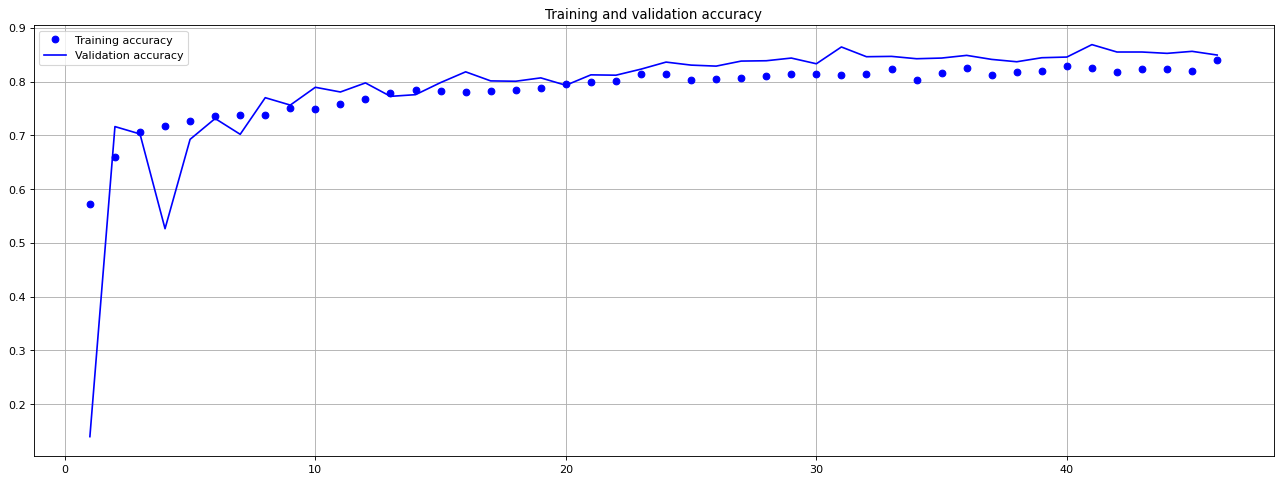

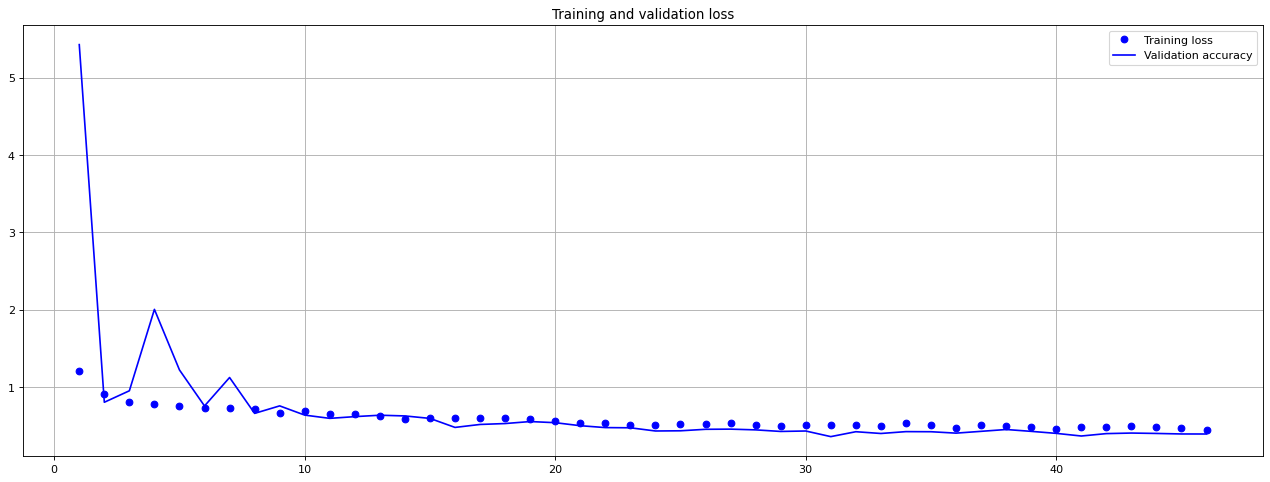

In [82]:
#графіки зміни точності та втрат на тестових та валідаційних даних:
accuracy = history_unfreeze.history["accuracy"]
val_accuracy = history_unfreeze.history["val_accuracy"]

loss = history_unfreeze.history["loss"]
val_loss = history_unfreeze.history["val_loss"]

epochs = range(1, len(accuracy)+1)

plt.figure(figsize = (20,7), dpi=80)
plt.grid(True)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize = (20,7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation accuracy")
plt.title("Training and validation loss")
plt.legend()


1/1 [==============================] - 0s 54ms/step


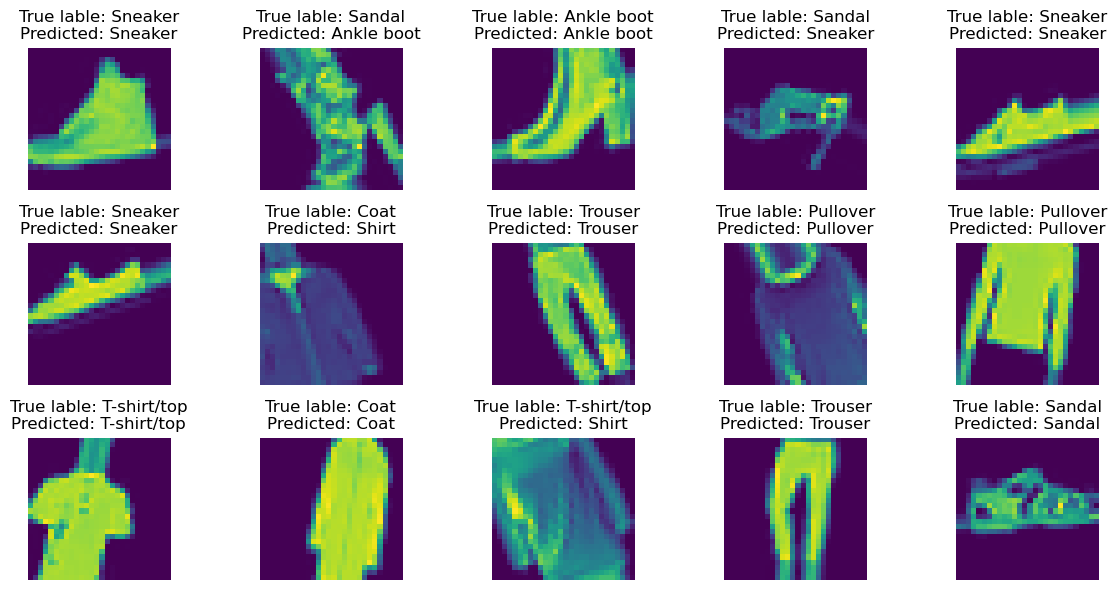

In [119]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

num_images = 15

augmented_images, augmented_labels = next(train_generator)
predictions_with_unfreeze_vgg16 = model_unfreeze.predict(augmented_images)
predicted_labels = np.argmax(predictions_with_unfreeze_vgg16, axis=1)

plt.figure(figsize=(12,6))

for i in range(num_images):
    true_label = np.argmax(augmented_labels[i]) 
    predicted_label = predicted_labels[i]
    plt.subplot(3,5,i+1)

    plt.imshow((augmented_images[i]*255).astype("uint8"))
    plt.axis("off")
    plt.title(f"True lable: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")

plt.tight_layout()
plt.show()





Вывод:
1. Первая модель построена с учётом добавления convolutional layers, что дало прирост точности  3% относительно прошлого домашнего задания, когда данные слои не использовались. Результате точность составилa: 0.9222
2. Вторая модель построена С добавлением слоев VGG16. Данные слои были заморожены для обучения и обучались только самые верхние слои Dense. Эта модель показала точность 0.78430 что гораздо хуже предыдущего результата.
3. третье модель построена с учётом добавления слоев VGG16, однако были разморожены слои начиная с block5_conv1. Кроме того был использован метод позволяющий регулировать градиент на более поздних этапах. это все помогло увеличить точность c 0.78430 до 0.85079

Наиболее точной оказалась модель с добавлением convolutional layers.